In [5]:
!python -V

Python 3.7.4


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:

conv = lambda x: np.float((x.replace(",", ".")))
df = pd.read_csv("input/simdata214.csv", sep=';')
float_cols = df.select_dtypes("object").columns
df.loc[:, float_cols] = df[float_cols].applymap(conv)

sig_coord = ["Signal_X", "Signal_Y", "Signal_Z"]
pos_coord = ["Position_X", "Position_Y", "Position_Z"]

In [36]:
df.head()

,Milliseconds,Rssi,Signal_X,Signal_Y,Signal_Z,Position_X,Position_Y,Position_Z
0,0,-97,7.3,-4.3,1.8,25,-1,1.5
1,0,-96,32.5,-16.5,1.7,25,-1,1.5
2,0,-96,21.1,-17.2,4.0,25,-1,1.5
3,0,-96,27.5,-15.8,5.1,25,-1,1.5
4,0,-87,25.2,-12.0,5.2,25,-1,1.5


In [35]:
df.Milliseconds.nunique()

101

In [72]:
# table of beacons
bc_df = df.groupby(sig_coord).size().to_frame().reset_index()[sig_coord]
bc_df["bc_name"] = [f"bc_{i}" for i in range(len(bc_df))]
# bc_df.set_index("bc_name", inplace=True)
print("Number of unique beacons: ", len(bc_df))
bc_df.head(3)

Number of unique beacons:  53


,Signal_X,Signal_Y,Signal_Z,bc_name
0,7.3,-4.3,1.8,bc_0
1,7.4,-2.8,4.0,bc_1
2,7.5,-8.9,1.7,bc_2


In [74]:
# concatinate "df" with "bc_df" by "sig_coord"
df = df.merge(bc_df, how="left", on=sig_coord)
df.head()

,Milliseconds,Rssi,Signal_X,Signal_Y,Signal_Z,Position_X,Position_Y,Position_Z,bc_name
0,0,-97,7.3,-4.3,1.8,25,-1,1.5,bc_0
1,0,-96,32.5,-16.5,1.7,25,-1,1.5,bc_33
2,0,-96,21.1,-17.2,4.0,25,-1,1.5,bc_14
3,0,-96,27.5,-15.8,5.1,25,-1,1.5,bc_27
4,0,-87,25.2,-12.0,5.2,25,-1,1.5,bc_24


In [81]:
# check if unique beacons doubled while certain part of time
assert np.any(df.groupby(["Milliseconds", "bc_name"]).size()>1) == False, "Some beacons are not unique"

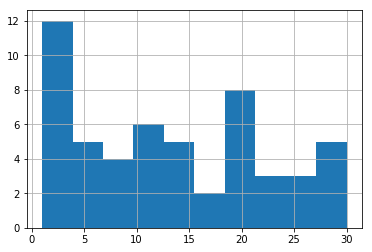

In [84]:
df.bc_name.value_counts().hist();

In [124]:
# Xarr = []
# Yarr = np.zeros( (len(bc_df), len(pos_coord)) )
# for t in df.Milliseconds.unique()[:3]:
#     res = bc_df.merge(df[df.Milliseconds==t], on=sig_coord, how='left').reset_index()
#     Xarr.append([res[sig_coord + ["Rssi"]].fillna(-110).values])
#     Yarr[t, :] = df[df.Milliseconds==t][pos_coord].values

In [114]:
df.loc[df.Milliseconds==0, pos_coord]

,Position_X,Position_Y,Position_Z
0,25,-1,1.5
1,25,-1,1.5
2,25,-1,1.5
3,25,-1,1.5
4,25,-1,1.5


In [122]:
df[["Milliseconds"]+pos_coord]

,Milliseconds,Position_X,Position_Y,Position_Z
0,0,25,-1,1.5
1,0,25,-1,1.5
2,0,25,-1,1.5
3,0,25,-1,1.5
4,0,25,-1,1.5
...,...,...,...,...
698,30000,25,-1,1.5
699,30000,25,-1,1.5
700,30000,25,-1,1.5
701,30000,25,-1,1.5


In [123]:
df

,Milliseconds,Rssi,Signal_X,Signal_Y,Signal_Z,Position_X,Position_Y,Position_Z,bc_name
0,0,-97,7.3,-4.3,1.8,25,-1,1.5,bc_0
1,0,-96,32.5,-16.5,1.7,25,-1,1.5,bc_33
2,0,-96,21.1,-17.2,4.0,25,-1,1.5,bc_14
3,0,-96,27.5,-15.8,5.1,25,-1,1.5,bc_27
4,0,-87,25.2,-12.0,5.2,25,-1,1.5,bc_24
...,...,...,...,...,...,...,...,...,...
698,30000,-99,35.9,-15.9,4.0,25,-1,1.5,bc_42
699,30000,-97,33.5,-15.8,5.1,25,-1,1.5,bc_38
700,30000,-98,40.1,-11.3,1.7,25,-1,1.5,bc_49
701,30000,-86,25.2,-12.0,5.2,25,-1,1.5,bc_24
